In [37]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn

%matplotlib inline

In [2]:
nsadat = fits.getdata('nsa_v0_1_2.fits')
yangdat = fits.getdata('YangDR7PetroToNSA.fits')
simarddat = fits.getdata('Simard2ToNSA.fits')
agcdat = fits.getdata()

In [79]:
print min(abs(nsadat['ABSMAG'][:,4]))

0.0


In [88]:
NUV = nsadat['ABSMAG'][:,1]
R = nsadat['ABSMAG'][:,4]
flag = np.ones(len(R),dtype = bool) 
for i in range(len(R)):
    if abs(NUV[i]) == 0: 
        flag[i] = False
        print "NUV", i
    if abs(R[i]) == 0:
        flag[i] = False
        print "R", i
    if NUV[i] - R[i] > 10:
        flag[i] = False
color = NUV[flag] - R[flag]
mag = R[flag]

NUV 132654
R 132654


41305
41305
41305


<function matplotlib.pyplot.show>

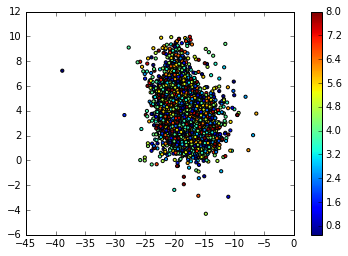

In [89]:
#SIMARD SERSIC FIT PLOT

kolor = []
magg = []
n = []
for i in range(len(color)):
    if len(simarddat['nb'][i]) > 0:
        kolor.append(color[i])
        magg.append(mag[i])
        n.append(simarddat['nb'][i])

print len(kolor)
print len(magg)
print len(n)
ds = np.ones(len(kolor))
plt.figure()
plt.scatter(magg,kolor,s=ds*10,c=n)
plt.colorbar()
plt.show

In [56]:
len(simarddat['nb'][0])

6

In [ ]:
#AGC HI CONTENT PLOT

color = nsadat['ABSMAG'][:,1] - nsadat['ABSMAG'][:,4]
mag = nsadat['ABSMAG'][:,4]

kolor = []
magg = []
hi = []
for i in range(len(color)):
    if len(agcdat['RA'][i]) > 0:
        kolor.append(color[i])
        magg.append(mag[i])
        hi.append(agcdat['FLUX100'][i])
HIflag = np.ones(len(kolor),dtype = bool) # is HI
noHIflag = np.zeros(len(kolor),dtype = bool) # no HI
for i in range(len(kolor)):
    if hi[i] == 0:
        HIflag[i] = False
        noHIflag[i] = True
        


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(kolor[HIflag], magg[HIflag], s=10, c='b', marker="s", label='Contains HI')
ax1.scatter(kolor[noHIflag], magg[noHIflag], s=10, c='r', marker="o", label='No HI')
plt.legend(loc='upper left');
plt.show()

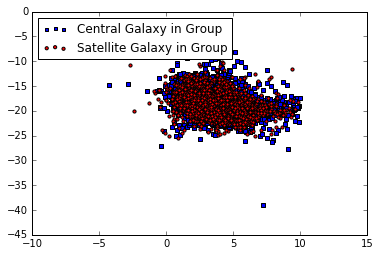

In [90]:
# YANG CENTRAL GAL PLOT

kolor = []
magg = []
gal = []
for i in range(len(color)):
    if yangdat['massive_gal'][i] > 0:
        kolor.append(color[i])
        magg.append(mag[i])
        gal.append(yangdat['massive_gal'][i])
Centralflag = np.ones(len(kolor),dtype = bool) # is central
Satiflag = np.zeros(len(kolor),dtype = bool) # is satellite 
for i in range(len(kolor)):
    if gal[i] == 2:
        Centralflag[i] = False
        Satiflag[i] = True
kolor = np.array(kolor)
magg = np.array(magg)


fig = plt.figure()
ax1 = fig.add_subplot(111)
kulor = kolor[Centralflag]
mugg = magg[Centralflag]
kalor = kolor[Satiflag]
mogg = magg[Satiflag]
ax1.scatter(kulor, mugg, s=10, c='b', marker="s", label='Central Galaxy in Group')
ax1.scatter(kalor, mogg, s=10, c='r', marker="o", label='Satellite Galaxy in Group')
plt.legend(loc='upper left');
plt.show()